In [28]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
# Data Preprocessing
df = df.iloc[:, [0, 1]] # Select only the first two columns
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

C:\Users\ayush\AppData\Local\Temp\ipykernel_29556\1086078623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [11]:
print("Sample of the dataset:")
display(df.head())

Sample of the dataset:


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Text cleaning function
def clean_text(text):
    """
    Cleans text by removing punctuation, converting to lowercase,
    removing stopwords, and applying stemming.
    """
    # 1. Lowercase conversion
    text = text.lower()
    
    # 2. Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    
    # 3. Remove stopwords and stem
    stop_words = set(stopwords.words('english'))
    lemma = WordNetLemmatizer()
    
    processed_text = []
    for word in text.split():
        if word not in stop_words:
            processed_text.append(lemma.lemmatize(word))
    
    return " ".join(processed_text)

In [16]:
# Apply the cleaning function to the text column
print("Applying text cleaning...")
df['clean_text'] = df['text'].apply(clean_text)

print("Sample of the cleaned text:")
display(df[['text', 'clean_text']].head())

Applying text cleaning...
Sample of the cleaned text:


C:\Users\ayush\AppData\Local\Temp\ipykernel_29556\1745293886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].apply(clean_text)


,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [17]:
# Vectorization
# Using TF-IDF Vectorizer
print("Vectorizing text using TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label'].values

print(f"Shape of the vectorized data (X): {X.shape}")
print("---")

Vectorizing text using TF-IDF...
Shape of the vectorized data (X): (5572, 5000)
---


In [18]:
# Model Training
print("Splitting data and training the model...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Multinomial Naive Bayes as the classifier
model = MultinomialNB()
model.fit(X_train, y_train)

print("Model trained successfully.")
print("---")

Splitting data and training the model...
Model trained successfully.
---


Evaluating model performance...
Accuracy: 0.9731
Precision: 1.0000
Recall: 0.8000
F1 Score: 0.8889


,0,1,accuracy,macro avg,weighted avg
precision,0.969849,1.000000,0.973094,0.984925,0.973905
recall,1.000000,0.800000,0.973094,0.900000,0.973094
f1-score,0.984694,0.888889,0.973094,0.936791,0.971805
support,965.000000,150.000000,0.973094,1115.000000,1115.000000



Confusion Matrix:


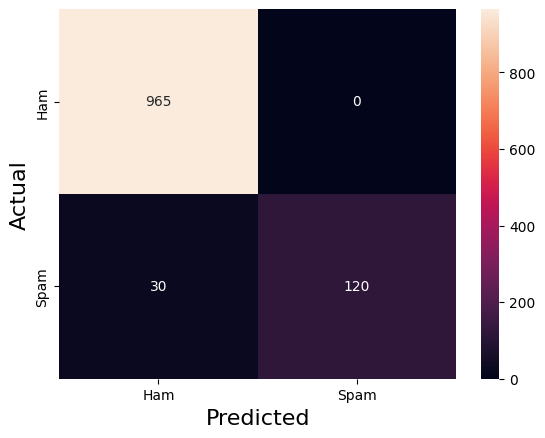

---


In [29]:
# Performance Evaluation
print("Evaluating model performance...")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

report = classification_report(y_test, y_pred, output_dict=True)
display(pd.DataFrame(report))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.show()
print("---")

In [20]:
# STEP 5: Save the Model and Vectorizer
print("Saving the model and vectorizer to disk...")
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)
    
print("Model and vectorizer saved successfully.")
print("---")

Saving the model and vectorizer to disk...
Model and vectorizer saved successfully.
---


In [21]:
# Interactive Demo
print("Interactive demo: Test with a new message.")

def classify_sms(message):
    """
    Predicts if a new message is 'ham' or 'spam'.
    """
    # Load the saved model and vectorizer
    with open('model.pkl', 'rb') as model_file:
        loaded_model = pickle.load(model_file)
    
    with open('vectorizer.pkl', 'rb') as vectorizer_file:
        loaded_vectorizer = pickle.load(vectorizer_file)

    # Preprocess the message
    processed_message = clean_text(message)
    
    # Vectorize the message
    vectorized_message = loaded_vectorizer.transform([processed_message]).toarray()
    
    # Make the prediction
    prediction = loaded_model.predict(vectorized_message)[0]
    
    return "SPAM" if prediction == 1 else "HAM"

Interactive demo: Test with a new message.


In [22]:
# Example 1: Spam message
test_message_1 = "Congratulations! You've won a brand new car. Text 'CLAIM' to 12345 to claim your prize."
result_1 = classify_sms(test_message_1)
print(f"Message: '{test_message_1}'\nPrediction: {result_1}")
print("\n---")

# Example 2: Ham message
test_message_2 = "Hey, do you want to grab dinner later?"
result_2 = classify_sms(test_message_2)
print(f"Message: '{test_message_2}'\nPrediction: {result_2}")
print("\n---")

Message: 'Congratulations! You've won a brand new car. Text 'CLAIM' to 12345 to claim your prize.'
Prediction: SPAM

---
Message: 'Hey, do you want to grab dinner later?'
Prediction: HAM

---
